![Astrofisica Computacional](../../../logo.png)

---
## 01. Logistic Regression Algorithm.


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### About this notebook

In this worksheet, we introduce a Logistic regression algorithm to classify a dataset of stellar features.

---

### Linear Regression vs Logistic Regression

**Linear Regression** is one of the most simple *supervised regression machine learning algorithm*. In all regression models, the algorithm obtains a target prediction value based on independent variables. They are mostly used for finding out the relationship between variables and forecasting. 

Different regression models differ based on the kind of relationship between the dependent and independent variables they are considering and in the number of independent variables they consider (Multiple Linear Regression). It  based on the minimization of a cost (error) function, as for example the root mean squared error (minimum squares fit).

<img src="LinearRegression.png"  width=600 />

The equation obtained form a multiple linear regression has the general form

\begin{equation}
y = a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n 
\end{equation}



---

**Logistic Regression** is a *supervised classification machine learning algorithm*. In a classification problem, the target variable (output) can take only discrete values for a given set of features (inputs). For example, logistic regression may be used to predict a target with only two possible values: 0 and 1 or `True` and `False`.

<img src="Logistic01.png"  width=600 />


Logistic regression is based on the concept of *Maximum Likelihood estimation*. When working with numerical values in logistic regression, we pass the weighted sum of inputs through an activation function that can map values in between 0 and 1. Such activation function is known as **sigmoid function** and the curve obtained is called as sigmoid curve or S-curve.

<img src="Logistic02.png"  width=600 />




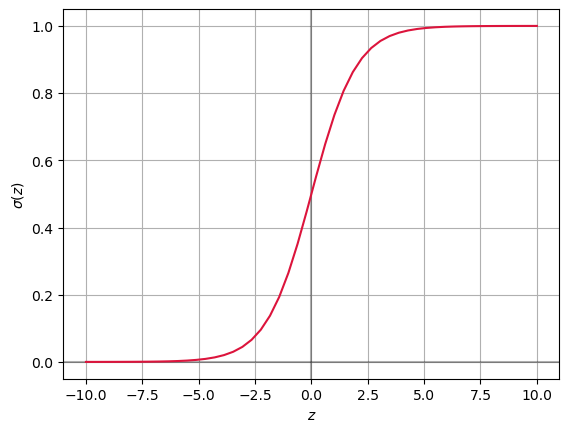

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z)) 

zrange = np.linspace(-10,10,50)

plt.figure()
plt.axhline(0, color='black', alpha=0.3)
plt.axvline(0, color='black', alpha=0.3)
plt.plot(zrange, sigmoid(zrange), color='crimson')
plt.xlabel(r'$z$')
plt.ylabel(r'$\sigma (z)$')
plt.grid()
plt.show()



---

The relation beteween a linear regression and a logistic regression is given by the activation function (sigmoid). In fact, considering the sigmoid functon

\begin{equation}
S(z) = \frac{1}{1+e^{-z}}
\end{equation}

and replacing the linear regression equation as $S=y$ and $z = a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n$ we obtain

\begin{align}
y = &\frac{1}{1+e^{-(a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n)}} \\
\frac{1}{y} = & 1+e^{-(a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n)}  \\
\frac{1}{y} - 1 = & e^{-(a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n)}  \\
\log \left[\frac{1}{y} - 1\right] = & -(a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n)  \\
\log \left[\frac{1-y}{y} \right] = & -(a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n) 
\end{align}

Hence, the relation obtained from a  logistic regression is

\begin{equation}
\log \left[ \frac{y}{1-y}\right] = a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n
\end{equation}


---



## Stellar Types

We will consider a limited dataset taken from [Deepraj Baidya](https://www.kaggle.com/deepu1109) available at

[https://www.kaggle.com/datasets/deepu1109/star-dataset](https://www.kaggle.com/datasets/deepu1109/star-dataset)


We restrict the dataset to 200 stellar objects (samples) and just three features,

- Absolute Temperature [$K$]
- Relative Luminosity [$L/L_{\odot}$]
- **Star Type [Non-Main Sequence Star, Main Sequence Star] = [0,1]**

where 

$L_{\odot} = 3.828 x 10^26$ Watts (Avg Luminosity of Sun)

$R_{\odot} = 6.9551 x 10^8$ m (Avg Radius of Sun).

We want to train a logistic classification algorithm that predicts the *Star Type* from the other two features in the dataset.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('HRData.csv')
df

,Temperature (K),Luminosity(L/Lo),Star type
0,3068,0.002400,1
1,3042,0.000500,1
2,2600,0.000300,1
3,2800,0.000200,1
4,1939,0.000138,1
...,...,...,...
195,38940,374830.000000,0
196,30839,834042.000000,0
197,8829,537493.000000,0
198,9235,404940.000000,0


This data can be used to obtain the Hertzprung-Rusell diagram,

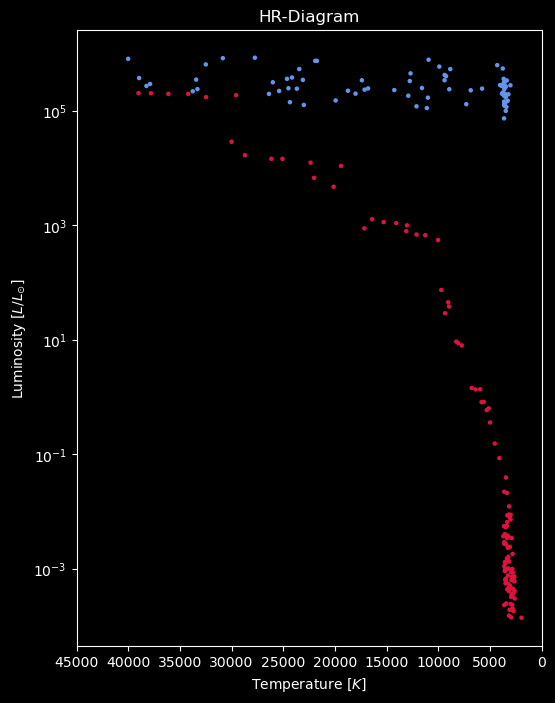

In [4]:
colors = {0:'cornflowerblue' , 1:'crimson'}

plt.style.use('dark_background')
plt.figure(figsize=(6,8))
plt.scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'], marker='.',
            c = [colors[i] for i in df['Star type']],
            s=20)

plt.xlim(45000,0)
plt.yscale('log')
plt.xlabel(r'Temperature [$K$]')
plt.ylabel(r'Luminosity [$L/L_{\odot}$]')
plt.title('HR-Diagram')
plt.show()

The red points are **Main sequence** stars while the blue points are either **supergiant** or **hypergiant** stars. We want to predict this classification using the temperature and the luminosity.

---
## Peparing the data

We will train a **Logistic Classification** algorithm using this information. The first step is to define the dependent and independent variables,

In [5]:
X = np.asarray(df[['Temperature (K)','Luminosity(L/Lo)']])
y = np.asarray(df[['Star type']], dtype=int)

X.shape, y.shape

((200, 2), (200, 1))

Now, we will split this set into train and test subsets, using the function [sk.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=413, test_size=0.3)

print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (140, 2)
Shape of Y_train :  (140, 1)
Shape of X_test :  (60, 2)
Shape of Y_test :  (60, 1)


## Logistic Regression

We will implement a **Logistic Regression** (binary classification) algorithm from scratch. We will use a fit function with the form

\begin{equation}
y_p (x;W,b) = \sigma (z(x;W,b)) 
\end{equation}

where $\sigma (z)$ represents the sigmoid (logistic) function,

\begin{equation}
\sigma (z) = \frac{1}{1+e^{-z}} 
\end{equation}

and $z(x;W,b) = Wx + b$. Therefore, we have

\begin{equation}
y_p (x;W,b) = \frac{1}{1+e^{-(Wx + b)}}. 
\end{equation}




## The Cost Function

Since the result of the regression will be a binary classification, with values 0 or 1, the cost function cannot have the form

\begin{equation}
f_{c} = \frac{1}{n} \sum_{i=1}^n \left( y_{p}(x_i) - y_i \right)^2.
\end{equation}


In order to define the correct cost function, consider the following probabilities:

- Probability to obtain a result of $y_i = 1$ for a given input $x_i$,

\begin{equation}
P(y_i = 1| x_i ; W,b) = \frac{1}{1 + \exp \left[-\left( W x_i + b \right)\right]}
\end{equation}

- Probability to obtain a result of $y_i = 0$ for a given input $x_i$,

\begin{equation}
P(y_i = 0| x_i ; W,b) = 1 - P(y_i = 1| x_i ; W,b).
\end{equation}


### Maximum Likelihood

In general, given all possible outcomes from a dataset $D = \{ (x_i, y_i) \}$ with the binary labels $y_i \in \{0,1\}$, where the data points are drawn independently, it is used the **M**aximum **L**ikelihood **E**stimation (**MLE**) principle. It states that we need to maximize the probability of seen the observed data and this can be written as the product od the individual probabilities of a specific outcome $y_i$, i.e.

\begin{align}
P(D ; W,b) = &\prod _{i=1}^n \left[ P(y_i=1 | x_i ; W,b) \right]^{y_i} \left[ P(y_i=0 | x_i ; W,b) \right]^{1-y_i}\\
P(D ; W,b) = &\prod _{i=1}^n \left[ P(y_i=1 | x_i ; W,b) \right]^{y_i} \left[ 1- P(y_i=1 | x_i ; W,b) \right]^{1-y_i}
\end{align}

Taking the logarithm of this probability, we obtain the (log-likelihood) cost as

\begin{equation}
C (W,b) = \sum _{i=1}^n  \left\{ y_i \left[\log P(y_i=1 | x_i ; W,b) \right] + (1-y_i) \log \left[ 1- P(y_i=1 | x_i ; W,b) \right] \right\}.
\end{equation}

Then, we will define a cost function as

\begin{equation}
f_{c} = - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log(y_p (x_i)) + (1-y_i)\log (1-y_p(x_i)) \right]
\end{equation}

where we included a minus sign in order to obtain a function that must be minimized. Note that this cost function implies that:

- For a sigle sample with target value $y_i = 0$, the cost function reduces to $f_{c} = - \log (1-y_p)$. Note that a prediction near $y_p \sim 1$ gives a huge cost, $f_c \rightarrow \infty$, while a prediction near $y_p \sim y_0 = 0$ gives a low cost, $f_c \rightarrow 0$.

- For a sigle sample with target value $y_i = 1$, the cost function reduces to $f_{c} = - \log (y_p)$. This time, a prediction of $y_p \sim 0$ gives a huge cost, $f_c \rightarrow \infty$, while a prediction of $y_p \sim y_0 = 1$ gives a low cost, $f_c \rightarrow 0$.

$f_c (W,b)$ is known in statistics as the **cross entropy** for two density functions $y$ and $y_p$. In a future lecture we will study the entropy and cross entropy in detail.


### Gradient of the Cost Function
The gradient of the cost function, w.r.t. the parameters $W$ and $b$ give
\begin{align}
\frac{ \partial f_{c}}{\partial W} = &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p} \frac{ \partial y_p}{\partial W} - \frac{1-y_i}{1-y_p} \frac{ \partial y_p}{\partial W} \right] \\ 
= &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p}  - \frac{1-y_i}{1-y_p}  \right]\left( y_p (1 -y_p) x_i \right) \\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i(1 -y_p) - (1-y_i) y_p  \right] x_i\\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i -  y_p  \right] x_i\\
= & \frac{1}{n} \sum_{i=1}^n \left[ y_p -  y_i  \right] x_i.
\end{align}

and 

\begin{align}
\frac{ \partial f_{c}}{\partial b} = &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p} \frac{ \partial y_p}{\partial b} - \frac{1-y_i}{1-y_p} \frac{ \partial y_p}{\partial b} \right] \\ 
= &- \frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{y_p}  - \frac{1-y_i}{1-y_p}  \right]\left( y_p (1 -y_p)\right) \\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i(1 -y_p) - (1-y_i) y_p  \right] \\
= &- \frac{1}{n} \sum_{i=1}^n \left[ y_i -  y_p  \right] \\
= & \frac{1}{n} \sum_{i=1}^n \left[ y_p -  y_i  \right].
\end{align}

In [7]:
class LogisticRegression():
    '''
    Logistic regression class
    '''
    def __init__(self):
        pass
    
    def sigmoid(self, Z):
        return 1/(1 + np.exp(-Z))

    def Z(self, X):
        '''
        Function to fit
        '''
        return self.b + np.dot(X,self.W)
    
    def predict(self, X):
        '''
        Predict method
        '''
        yp = self.sigmoid(self.Z(X))
        #yp = yp > 0.5
        return yp
    
    def cost(self, X, y):
        '''
        Cost function
        '''
        Yp = self.predict(X)
        return -(1/self.n)*np.sum(y*np.log(Yp) + (1-y)*np.log(1-Yp))
    
    def grad_cost(self, X,y):
        '''
        Analytic gradient of the cost function
        '''
        Yp = self.predict(X)
        grad_dW = (1/self.n)*np.dot(X.T, Yp-y)
        grad_db = (1/self.n)*np.sum(Yp-y)
        return grad_dW, grad_db
    
    def fit(self, X, y, alpha= 0.01):
        '''
        Optimization function
        '''
        # alpha : Learning rate
        tol = 1e-10    # Tolerance
        #np.random.seed(413)
        self.m = X.shape[1] # Number of features
        self.n = X.shape[0] # Number od samples
        
        self.W = np.zeros([self.m,1])#np.random.rand(self.m)
        self.b = 0#np.random.rand(1)
        Y = self.sigmoid(self.Z(X))

        self.history = []
        self.history.append(self.cost(X, y))
        print('Initial cost = ', self.history[0])
        
        epoch = 0 # Epochs
        epsilon = 1
        while epsilon>tol and epoch<900000:
            # Gradient
            grad_dW, grad_db = self.grad_cost(X,y)

            self.W = self.W - alpha*grad_dW
            self.b = self.b - alpha*grad_db
            
            self.history.append(self.cost(X, y))
            epsilon = abs(self.history[epoch] - self.history[epoch+1])
            epoch +=1
        
        print('Final cost = ', self.history[-1])
        print('Number of epochs = ',epoch)
    
    def accuracy(self, X, y):
        '''
        Calculates the accuracy of the algorithm
        as the percentage of succesful predictions
        '''
        Yp = self.predict(X)
        Yp = Yp > 0.5
        Yp = np.array(Yp, dtype = 'int64')
        acc = (1 - np.sum(abs(Yp - y))/len(y))*100
        print("Accuracy of the model is : ", round(acc, 2), "%")
        
    

We train the model using the presented data,

In [8]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

print('\nThe optimized parameters are')
print('W = ', lr.W)
print('b = ', lr.b)

Initial cost =  0.6931471805599453
Final cost =  nan
Number of epochs =  1

The optimized parameters are
W =  [[  -8.63371429]
 [-611.4451661 ]]
b =  0.0007142857142857143


/var/folders/rg/9mmttz3x0hz3mvcrk2c92x_h0000gn/T/ipykernel_28496/3268192516.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))
/var/folders/rg/9mmttz3x0hz3mvcrk2c92x_h0000gn/T/ipykernel_28496/3268192516.py:30: RuntimeWarning: divide by zero encountered in log
  return -(1/self.n)*np.sum(y*np.log(Yp) + (1-y)*np.log(1-Yp))
/var/folders/rg/9mmttz3x0hz3mvcrk2c92x_h0000gn/T/ipykernel_28496/3268192516.py:30: RuntimeWarning: invalid value encountered in multiply
  return -(1/self.n)*np.sum(y*np.log(Yp) + (1-y)*np.log(1-Yp))


Note that the algorithm is not trained because the cost function diverges after one epoch. The reason is the big values in the Temperature and Luminosity features.

In [9]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Star type
count,200.000000,200.000000,200.000000
mean,9810.665000,128626.033475,0.600000
std,10095.992671,189462.859709,0.491127
min,1939.000000,0.000138,0.000000
25%,3253.500000,0.001463,0.000000
50%,3625.000000,738.500000,1.000000
75%,12925.500000,220750.000000,1.000000
max,40000.000000,849420.000000,1.000000


### Scaling the Data

In order to obtain a good training of the logistic regression algorithm, we will scale the input features.

[Scikit-Learn](https://scikit-learn.org/stable/index.html) has several functions which allow us to rescale the data, normally resulting in much better results in terms of various accuracy scores. 

* The [scikitlearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) function standardize features by removing the mean and scaling to unit variance. This ensures that for each feature we study the mean value is zero and the variance is one. This scaling has the drawback that it does not ensure that we have a particular maximum or minimum in our data set. 

* The function  [scikitlearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) ensures that all features are exactly between 0 and 1.

* The [scikitlearn.preprocessing.Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) function scales each data point such that the feature vector has a euclidean length of one. In other words, it projects a data point on the circle (or sphere in the case of higher dimensions) with a radius of 1. This means every data point is scaled by a different number (by the inverse of it’s length). This normalization is often used when only the direction (or angle) of the data matters, not the length of the feature vector.

* The [scikitlearn.preprocessing.RobustScaler( )](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)  works similarly to the StandardScaler in that it ensures statistical properties for each feature that guarantee that they are on the same scale. However, the RobustScaler uses the median and quartiles, instead of mean and variance. This makes the RobustScaler ignore data points that are very different from the rest (like measurement errors). These odd data points are also called **outliers**, and might often lead to trouble for other scaling techniques.


We will try first the StandardScaler function,

In [10]:
from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()
scaler_train.fit(X_train)

scaler_test = StandardScaler()
scaler_test.fit(X_test)

X_train_scaled = scaler_train.transform(X_train)
X_test_scaled = scaler_test.transform(X_test)

Compare the first ten element in the original and scaled sets, 

In [11]:
X_test[:10], X_test_scaled[:10]

(array([[2.61400e+04, 1.45200e+04],
        [3.55300e+03, 1.45000e+05],
        [1.20980e+04, 6.89000e+02],
        [3.22500e+03, 7.60000e-04],
        [8.05200e+03, 8.70000e+00],
        [3.66000e+03, 3.63000e+05],
        [3.89400e+04, 3.74830e+05],
        [3.08390e+04, 8.34042e+05],
        [2.65000e+03, 6.90000e-04],
        [2.86100e+03, 1.90000e-04]]),
 array([[ 1.47782833, -0.55754463],
        [-0.72848431,  0.123245  ],
        [ 0.10619677, -0.62970896],
        [-0.76052356, -0.63330386],
        [-0.28901911, -0.63325847],
        [-0.71803249,  1.26067708],
        [ 2.72814054,  1.32240104],
        [ 1.93682966,  3.71837564],
        [-0.81668993, -0.63330386],
        [-0.79607932, -0.63330387]]))

Now we train the alogorithm using the scaled data,

In [12]:
lr = LogisticRegression()

lr.fit(X_train_scaled, y_train, alpha=0.1)

print('\nThe optimized parameters are')
print('W = ',lr.W)
print('b = ',lr.b)

Initial cost =  0.6931471805599453
Final cost =  0.013089986396018561
Number of epochs =  900000

The optimized parameters are
W =  [[ 12.29420322]
 [-43.37183266]]
b =  -17.27826618427681


After 900000 epochs, with a learning rate of 0.1, the value of the cost function is 0.012. 
The accuracy method for the train set gives

In [13]:
lr.accuracy(X_train_scaled, y_train)

Accuracy of the model is :  99.29 %


While the accuracy for the test set is

In [14]:
lr.accuracy(X_test_scaled, y_test)

Accuracy of the model is :  95.0 %


The training history shows the behavior of the cost function during the epochs,

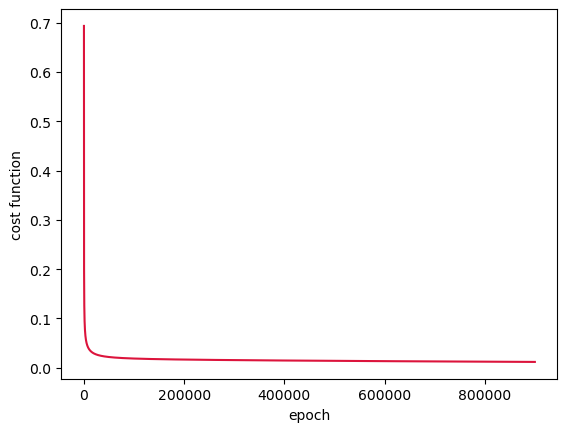

In [13]:
# Plot Training history
plt.style.use('default')
plt.figure()
plt.plot(lr.history, color='crimson')
plt.ylabel(r'cost function')
plt.xlabel(r'epoch')
plt.show()

An interesting form to illustrate the score of a logistic model is using the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) in which we present the predictions and the target labels,

In [15]:
def confusion_matrix(X,y):
    yp = lr.predict(X)
    yp = yp>0.5
    yp = np.array(yp, dtype = 'int64')
    cm = np.array([[0,0],[0,0]])
    for i in range(len(y)):
        # MS prediction and MS target
        if yp[i]==1 and y[i]==1:
            cm[1,1] +=1
        # Non-MS prediction and MS target
        if yp[i]==0 and y[i]==1:
            cm[1,0] +=1
        # MS prediction and Non-MS target
        if yp[i]==1 and y[i]==0:
            cm[0,1] +=1
        # Non-MS prediction and Non-MS target
        if yp[i]==0 and y[i]==0:
            cm[0,0] +=1
    cm = cm/len(y)
    return cm 


cm = confusion_matrix(X_test_scaled, y_test)
#cm = confusion_matrix(X_train_scaled, y_train)
cm

array([[0.33333333, 0.        ],
       [0.05      , 0.61666667]])

Graphically, the confusion matrix is

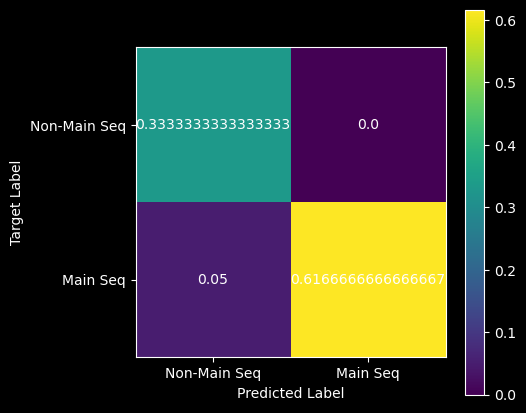

In [16]:
# Plot the Confusion-Matrix
plt.figure(figsize=(5,5))
plt.imshow(cm, extent=(0,1,0,1))
plt.xticks(ticks=[0.25,0.75], labels=('Non-Main Seq', 'Main Seq'))
plt.yticks(ticks=[0.25,0.75], labels=('Main Seq','Non-Main Seq'))
plt.xlabel('Predicted Label')
plt.ylabel('Target Label')
plt.text(0.25, 0.75, cm[0,0], color='white',horizontalalignment='center',verticalalignment='center')
plt.text(0.75, 0.75, cm[0,1], color='white',horizontalalignment='center',verticalalignment='center')
plt.text(0.25, 0.25, cm[1,0], color='white',horizontalalignment='center',verticalalignment='center')
plt.text(0.75, 0.25, cm[1,1], color='white',horizontalalignment='center',verticalalignment='center')
plt.colorbar()
plt.show()

For comparison, a perfect prediction will give the following confusion matrix,

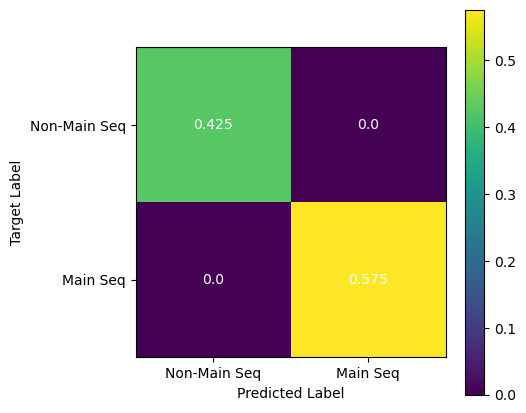

In [20]:
# Perfect Predictions Confusion-Matrix

def confusion_matrix2(yp,y):
    cm = np.array([[0,0],[0,0]])
    for i in range(len(y)):
        # MS prediction and MS target
        if yp[i]==1 and y[i]==1:
            cm[1,1] +=1
        # Non-MS prediction and MS target
        if yp[i]==0 and y[i]==1:
            cm[1,0] +=1
        # MS prediction and Non-MS target
        if yp[i]==1 and y[i]==0:
            cm[0,1] +=1
        # Non-MS prediction and Non-MS target
        if yp[i]==0 and y[i]==0:
            cm[0,0] +=1
    cm = cm/len(y)
    return cm 


cmperf = confusion_matrix2(y_test, y_test)

plt.figure(figsize=(5,5))
plt.imshow(cmperf, extent=(0,1,0,1))
plt.xticks(ticks=[0.25,0.75], labels=('Non-Main Seq','Main Seq'))
plt.yticks(ticks=[0.25,0.75], labels=('Main Seq','Non-Main Seq'))
plt.xlabel('Predicted Label')
plt.ylabel('Target Label')
plt.text(0.25, 0.75, cmperf[0,0], color='white',horizontalalignment='center',verticalalignment='center')
plt.text(0.75, 0.75, cmperf[0,1], color='white',horizontalalignment='center',verticalalignment='center')
plt.text(0.25, 0.25, cmperf[1,0], color='white',horizontalalignment='center',verticalalignment='center')
plt.text(0.75, 0.25, cmperf[1,1], color='white',horizontalalignment='center',verticalalignment='center')
plt.colorbar()
plt.show()

The same result is obtained by using the functions [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) and  [sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

[[0.425 0.   ]
 [0.05  0.525]]


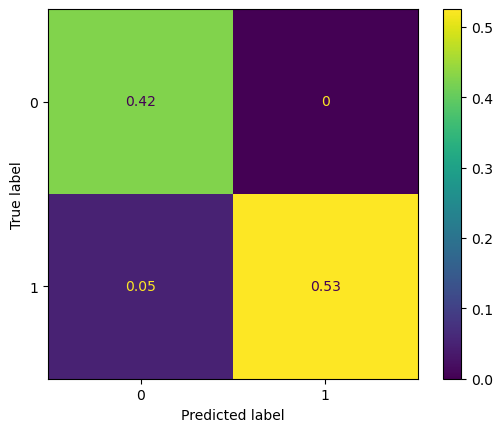

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

prediction = lr.predict(X_test_scaled)
prediction = prediction > 0.5
prediction = np.array(prediction, dtype = 'int64')

cm = confusion_matrix(y_test, prediction, normalize='all')
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()